In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn faker pyarrow category_encoders anonymizedf

In [5]:
# Uso de EDA y Anonimización Modular
# ===========================================
# Este notebook muestra el código modular para el EDA del proyecto de anonimización de datos bancarios

# Importar las funciones del módulo principal
# -----------------------------------------
# Cargando el código módular como 'eda_anonimizacion_modular.py'
from eda_anonimizacion_modular import *

In [7]:
# Ejecutar el proceso completo
# --------------------------
print("Ejecutando proceso completo de análisis y anonimización...\n")

Ejecutando proceso completo de análisis y anonimización...



In [9]:
# Defino rutas de archivosa necesario)
ruta_entrada = "dataset/anonimizacion_datos.csv"
ruta_salida = "dataset/anonimizacion_datos_anonimizado.csv"

In [11]:
# Ejecutando las funciones de forma módular
# ------------------------------------------------------------
print("\n\nEjecutando funciones individuales para un mayor control...\n")

# 1. Cargar y analizar datos
df = cargar_datos(ruta_entrada)
mostrar_info_basica(df)



Ejecutando funciones individuales para un mayor control...

Dataset cargado con 6362620 filas y 11 columnas.

===== INFORMACIÓN BÁSICA DEL DATASET =====

Primeras 5 filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0



Valores nulos por columna:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Analizando sólo los patrones de fraude:

Distribución de tipos de transacciones:


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Distribución de transacciones fraudulentas:


isFraud
0    6354407
1       8213
Name: count, dtype: int64


Porcentaje de transacciones fraudulentas: 0.13 %

===== ANÁLISIS DE FRAUDE POR TIPO DE TRANSACCIÓN =====


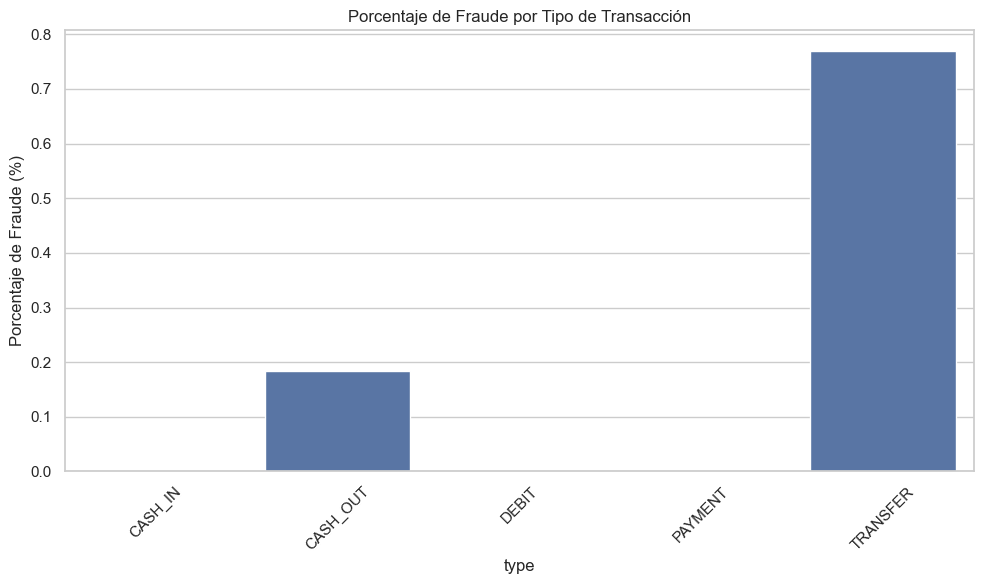

In [13]:
# 2. Análisis específico de fraude
print("\nAnalizando sólo los patrones de fraude:")
analizar_transacciones_fraude(df)
analizar_fraude_por_tipo(df)

In [15]:
# 3. Ejecutar solo la anonimización
print("\nEjecutando solo la anonimización:")
df_anon, fake = iniciar_anonimizacion(df)
df_anon = anonimizar_ids(df_anon)
df_anon = anonimizar_valores_numericos(df_anon)


Ejecutando solo la anonimización:

===== INICIANDO PROCESO DE ANONIMIZACIÓN =====

===== ANONIMIZANDO IDs =====

===== ANONIMIZANDO VALORES NUMÉRICOS =====


In [17]:
# 4. Verificar solo ciertos aspectos
verificar_ids_anonimizados(df, df_anon, ['nameOrig', 'nameDest'])


===== VERIFICACIÓN DE IDs ANONIMIZADOS =====

Solapamiento de valores en columna 'nameOrig': 9150 valores

Muestra comparativa de anonimización para 'nameOrig':


,Original,Anonimizado
0,C1231006815,C8733810799
1,C1666544295,C8482165776
2,C1305486145,C4834872938
3,C840083671,C324456353
4,C2048537720,C9732415206
5,C90045638,C84139583
6,C154988899,C544771148
7,C1912850431,C2732438655
8,C1265012928,C0112272591
9,C712410124,C475978232



Solapamiento de valores en columna 'nameDest': 1555 valores

Muestra comparativa de anonimización para 'nameDest':


,Original,Anonimizado
0,M1979787155,M4664297068
1,M2044282225,M4713305341
2,C553264065,C921349551
3,C38997010,C87796855
4,M1230701703,M6969159141
5,M573487274,M931729215
6,M408069119,M355693926
7,M633326333,M628080300
8,M1176932104,M1231523167
9,C195600860,C449346224


Dataset cargado con 6362620 filas y 11 columnas.

===== INFORMACIÓN BÁSICA DEL DATASET =====

Primeras 5 filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0



Valores nulos por columna:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

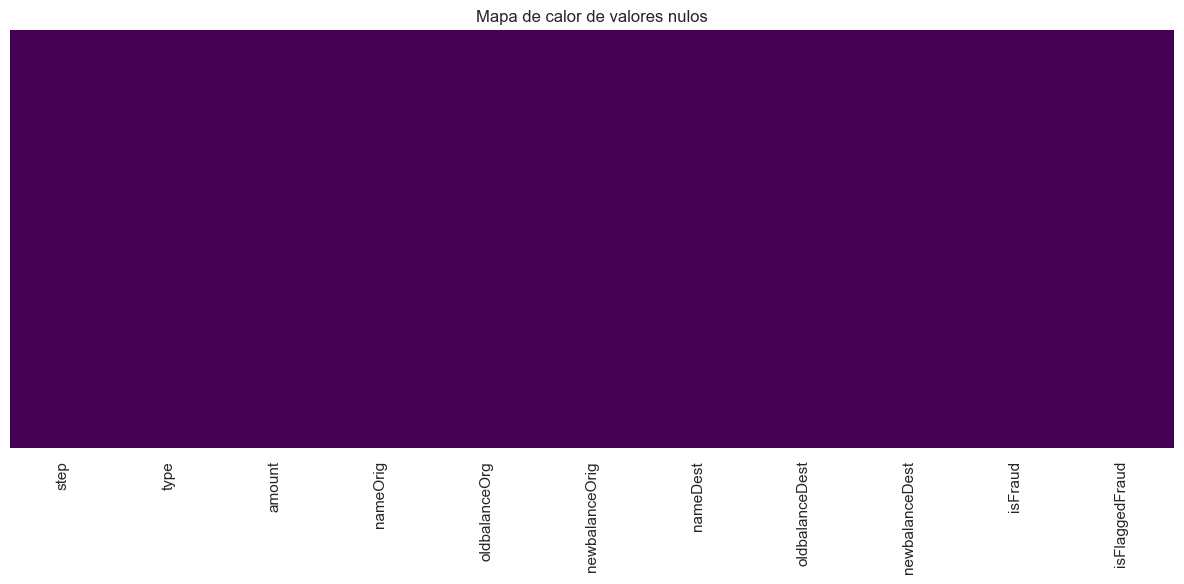


===== IDENTIFICACIÓN DE DATOS SENSIBLES =====

Columnas con información sensible identificadas:


['nameOrig', 'nameDest']


Columnas categóricas:


['type', 'nameOrig', 'nameDest']


Valores únicos en columna 'type': 5


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Valores únicos en columna 'nameOrig': 6353307


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64


Valores únicos en columna 'nameDest': 2722362


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


Distribución de tipos de transacciones:


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Distribución de transacciones fraudulentas:


isFraud
0    6354407
1       8213
Name: count, dtype: int64


Porcentaje de transacciones fraudulentas: 0.13 %

===== ANÁLISIS DE VARIABLES NUMÉRICAS =====


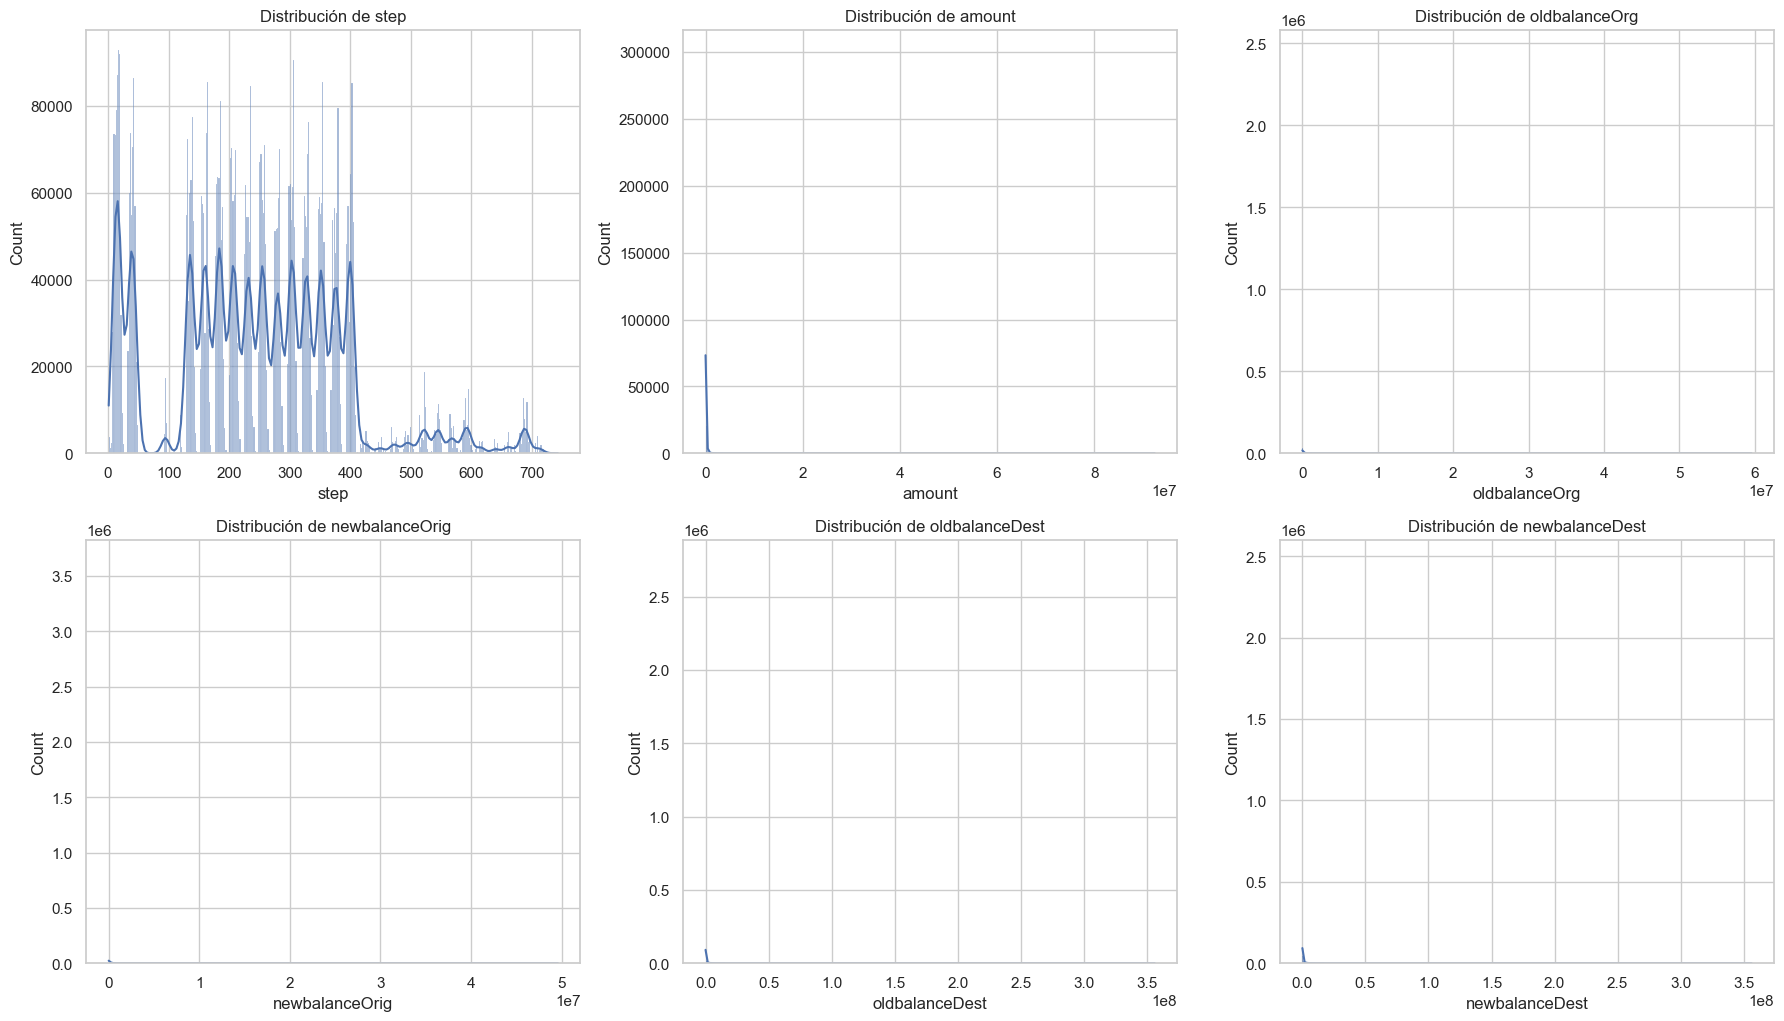

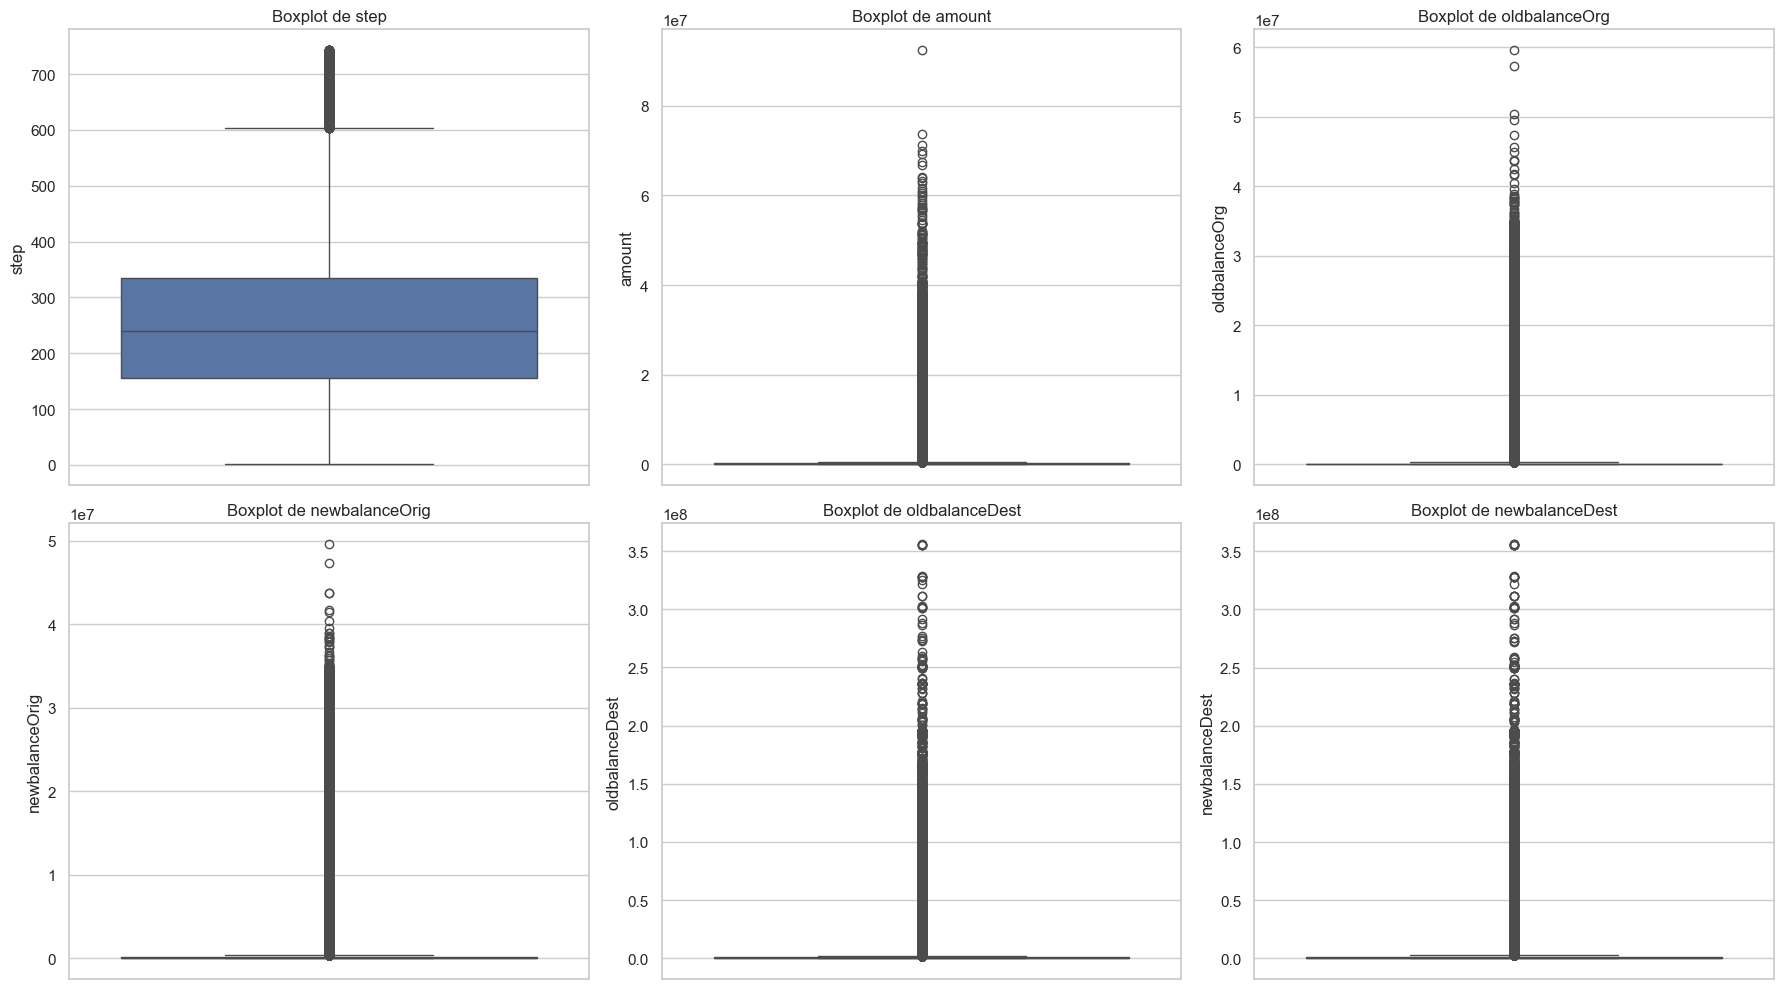


===== ANÁLISIS DE MONTOS POR TIPO Y FRAUDE =====


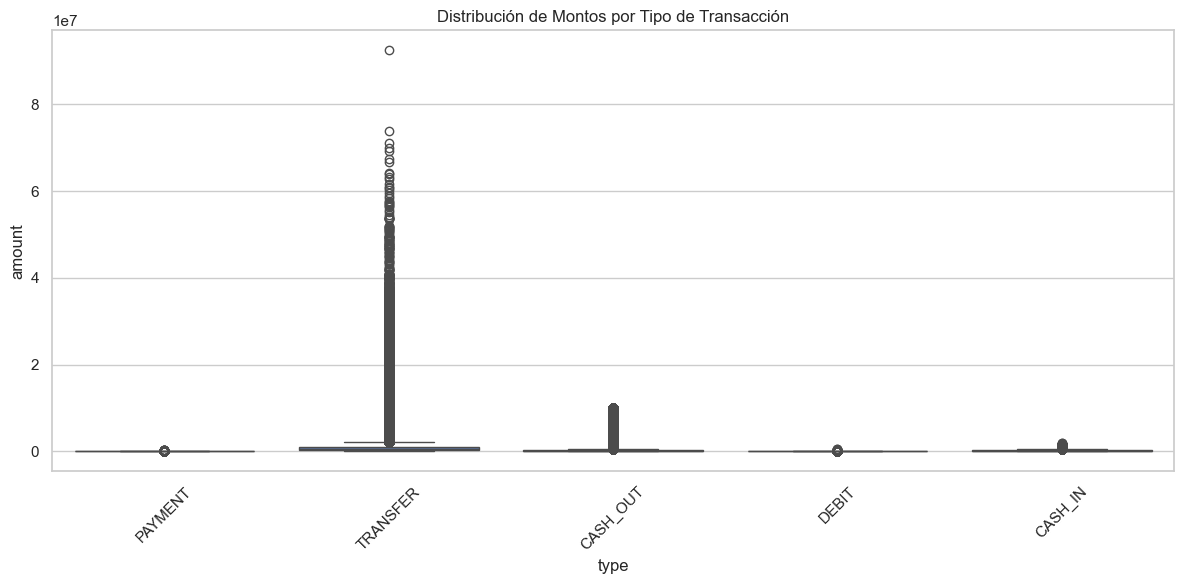

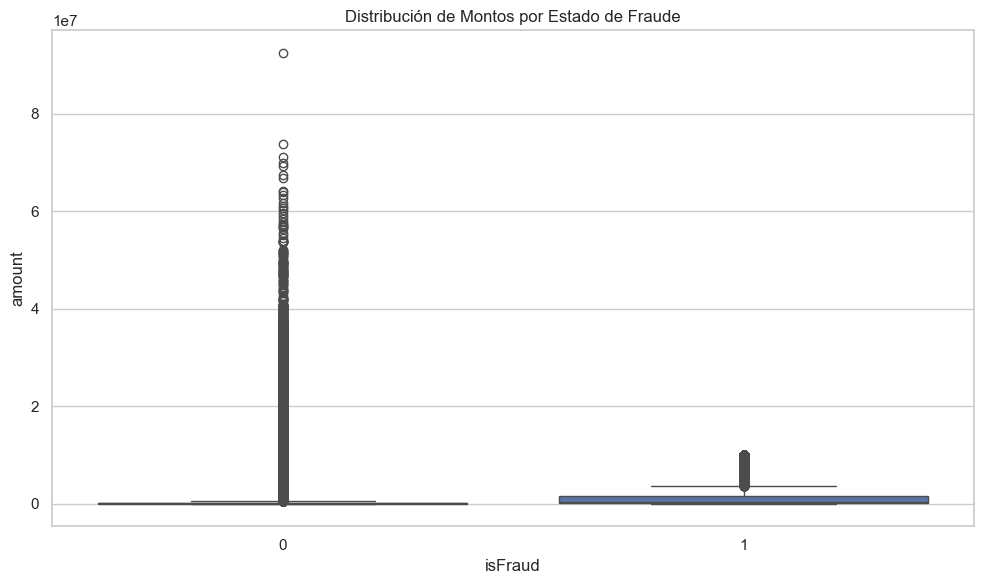


===== MATRIZ DE CORRELACIÓN =====


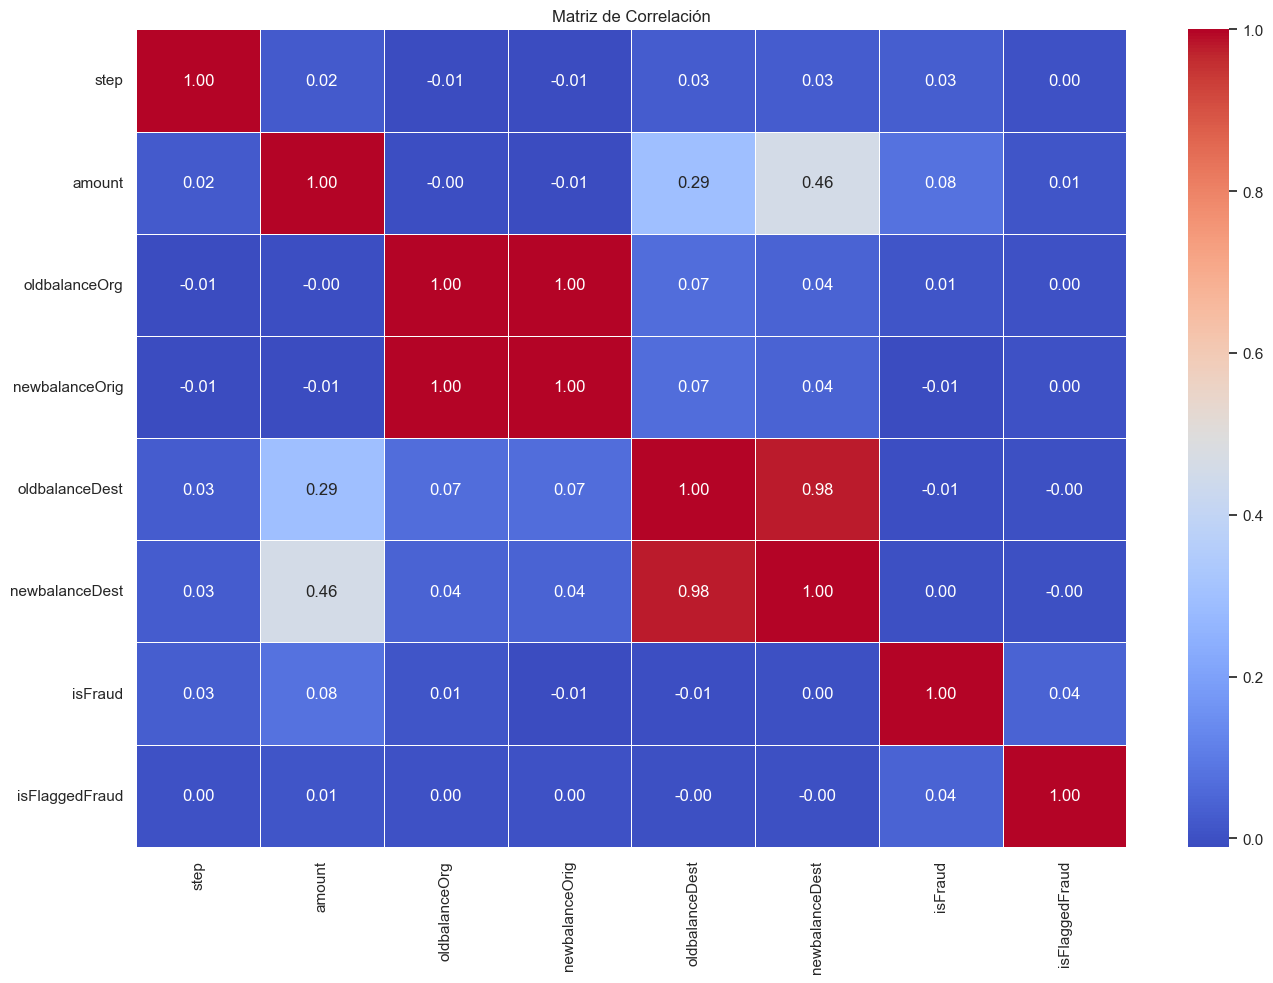


===== ANÁLISIS DE BALANCES =====


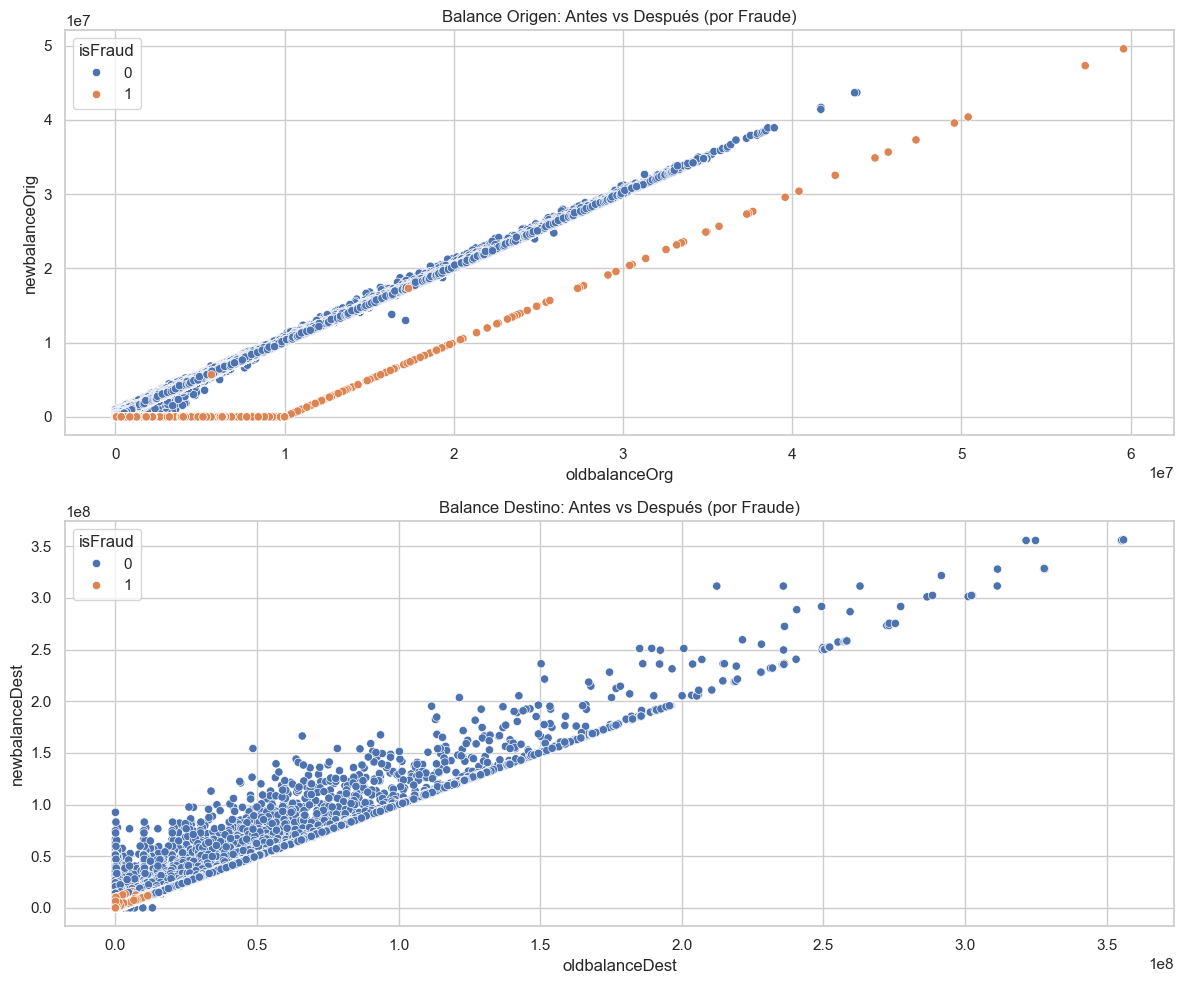


===== ANÁLISIS DE PATRONES TEMPORALES =====


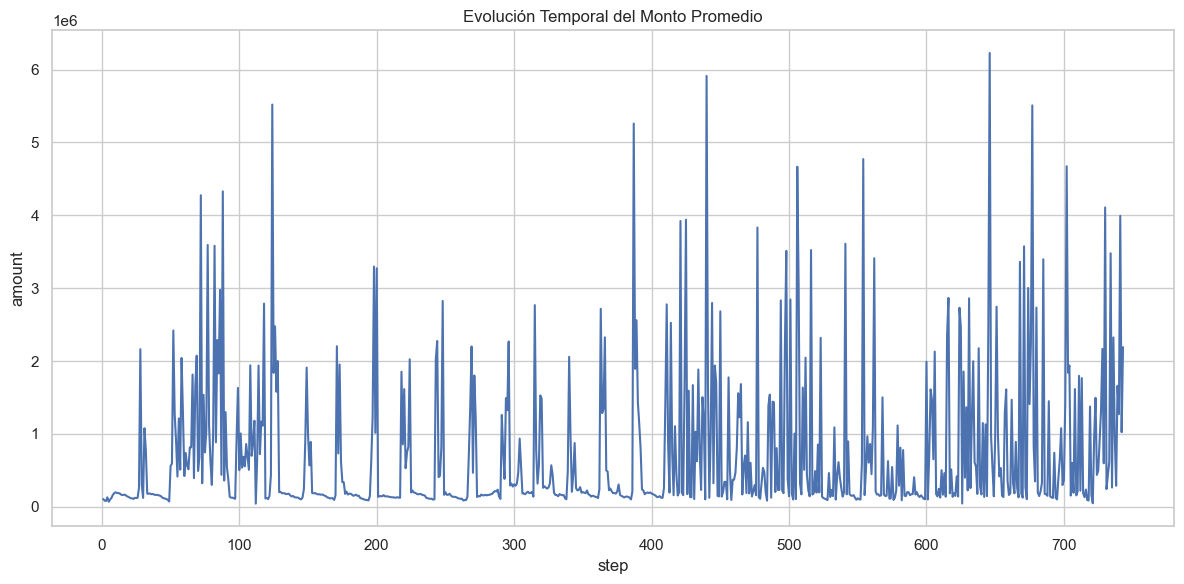


===== ANÁLISIS DE FRAUDE POR TIPO DE TRANSACCIÓN =====


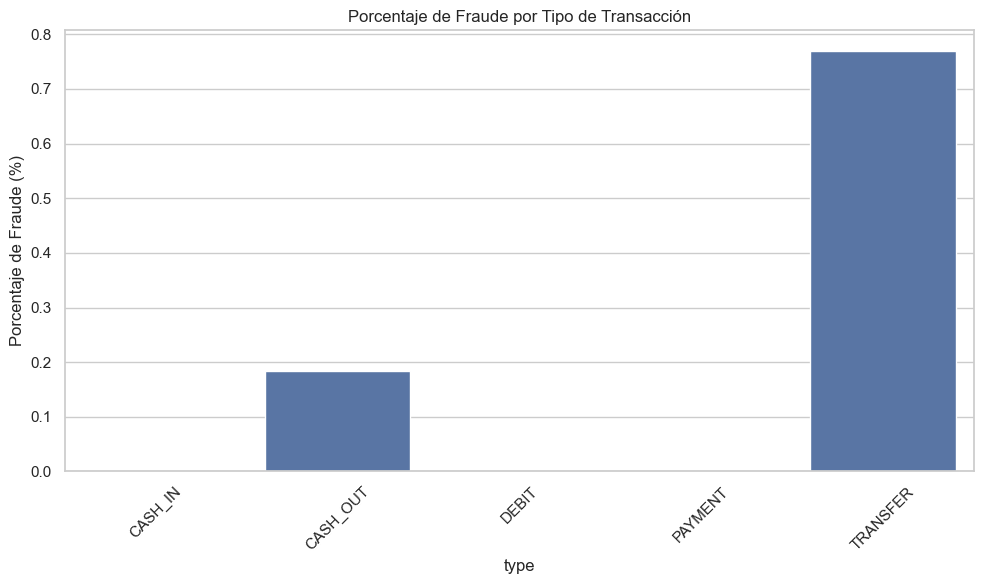


===== INICIANDO PROCESO DE ANONIMIZACIÓN =====
Formato de nameOrig: C1231006815
Formato de nameDest: M1979787155
Prefijos detectados en nameOrig: {'C'}

===== ANONIMIZANDO IDs =====

===== ANONIMIZANDO VALORES NUMÉRICOS =====

===== ANONIMIZANDO DIMENSIÓN TEMPORAL =====

===== COMPARACIÓN DE ESTADÍSTICAS =====
Estadísticas descriptivas originales:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00



Estadísticas descriptivas después de anonimización:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00000,239.000000,3.350000e+02,7.430000e+02
amount,6362620.0,1.812314e+05,6.037053e+05,0.0,17857.33302,75624.373132,2.095346e+05,9.242659e+07
oldbalanceOrg,6362620.0,8.465710e+05,2.885523e+06,0.0,0.00000,0.000000,1.713184e+05,5.970508e+07
newbalanceOrig,6362620.0,8.610867e+05,2.923380e+06,0.0,0.00000,0.000000,1.793302e+05,4.960575e+07
oldbalanceDest,6362620.0,1.103068e+06,3.399763e+06,0.0,0.00000,126967.900269,9.520349e+05,3.560300e+08
newbalanceDest,6362620.0,1.227488e+06,3.674752e+06,0.0,0.00000,221012.773655,1.121320e+06,3.561739e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00000,0.000000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00000,0.000000,0.000000e+00,1.000000e+00
step_bin,6362620.0,2.409678e+02,1.424008e+02,0.0,156.00000,234.000000,3.300000e+02,7.380000e+02



===== VERIFICACIÓN DE IDs ANONIMIZADOS =====

Solapamiento de valores en columna 'nameOrig': 8930 valores

Muestra comparativa de anonimización para 'nameOrig':


,Original,Anonimizado
0,C1231006815,C0791996369
1,C1666544295,C0187864863
2,C1305486145,C2820377912
3,C840083671,C454854754
4,C2048537720,C1136904504
5,C90045638,C50265811
6,C154988899,C564629466
7,C1912850431,C0641276882
8,C1265012928,C6827716590
9,C712410124,C073242990



Solapamiento de valores en columna 'nameDest': 1612 valores

Muestra comparativa de anonimización para 'nameDest':


,Original,Anonimizado
0,M1979787155,M5024901315
1,M2044282225,M9752412230
2,C553264065,C094686742
3,C38997010,C16846082
4,M1230701703,M1288706089
5,M573487274,M228660314
6,M408069119,M895392349
7,M633326333,M981861274
8,M1176932104,M0314570621
9,C195600860,C489311178



===== EVALUACIÓN DE RIESGO DE REIDENTIFICACIÓN =====
Combinación ('step_bin', 'type'): 1 registros únicamente identificables (0.00%)
Combinación ('step_bin', 'amount'): 5651565 registros únicamente identificables (88.82%)
Combinación ('step_bin', 'oldbalanceOrg'): 3176947 registros únicamente identificables (49.93%)
Combinación ('step_bin', 'newbalanceOrig'): 2318090 registros únicamente identificables (36.43%)
Combinación ('type', 'amount'): 5651560 registros únicamente identificables (88.82%)
Combinación ('type', 'oldbalanceOrg'): 3176947 registros únicamente identificables (49.93%)
Combinación ('type', 'newbalanceOrig'): 2318090 registros únicamente identificables (36.43%)
Combinación ('amount', 'oldbalanceOrg'): 5984946 registros únicamente identificables (94.06%)
Combinación ('amount', 'newbalanceOrig'): 5933194 registros únicamente identificables (93.25%)
Combinación ('oldbalanceOrg', 'newbalanceOrig'): 3529375 registros únicamente identificables (55.47%)
Combinación ('step_bin'

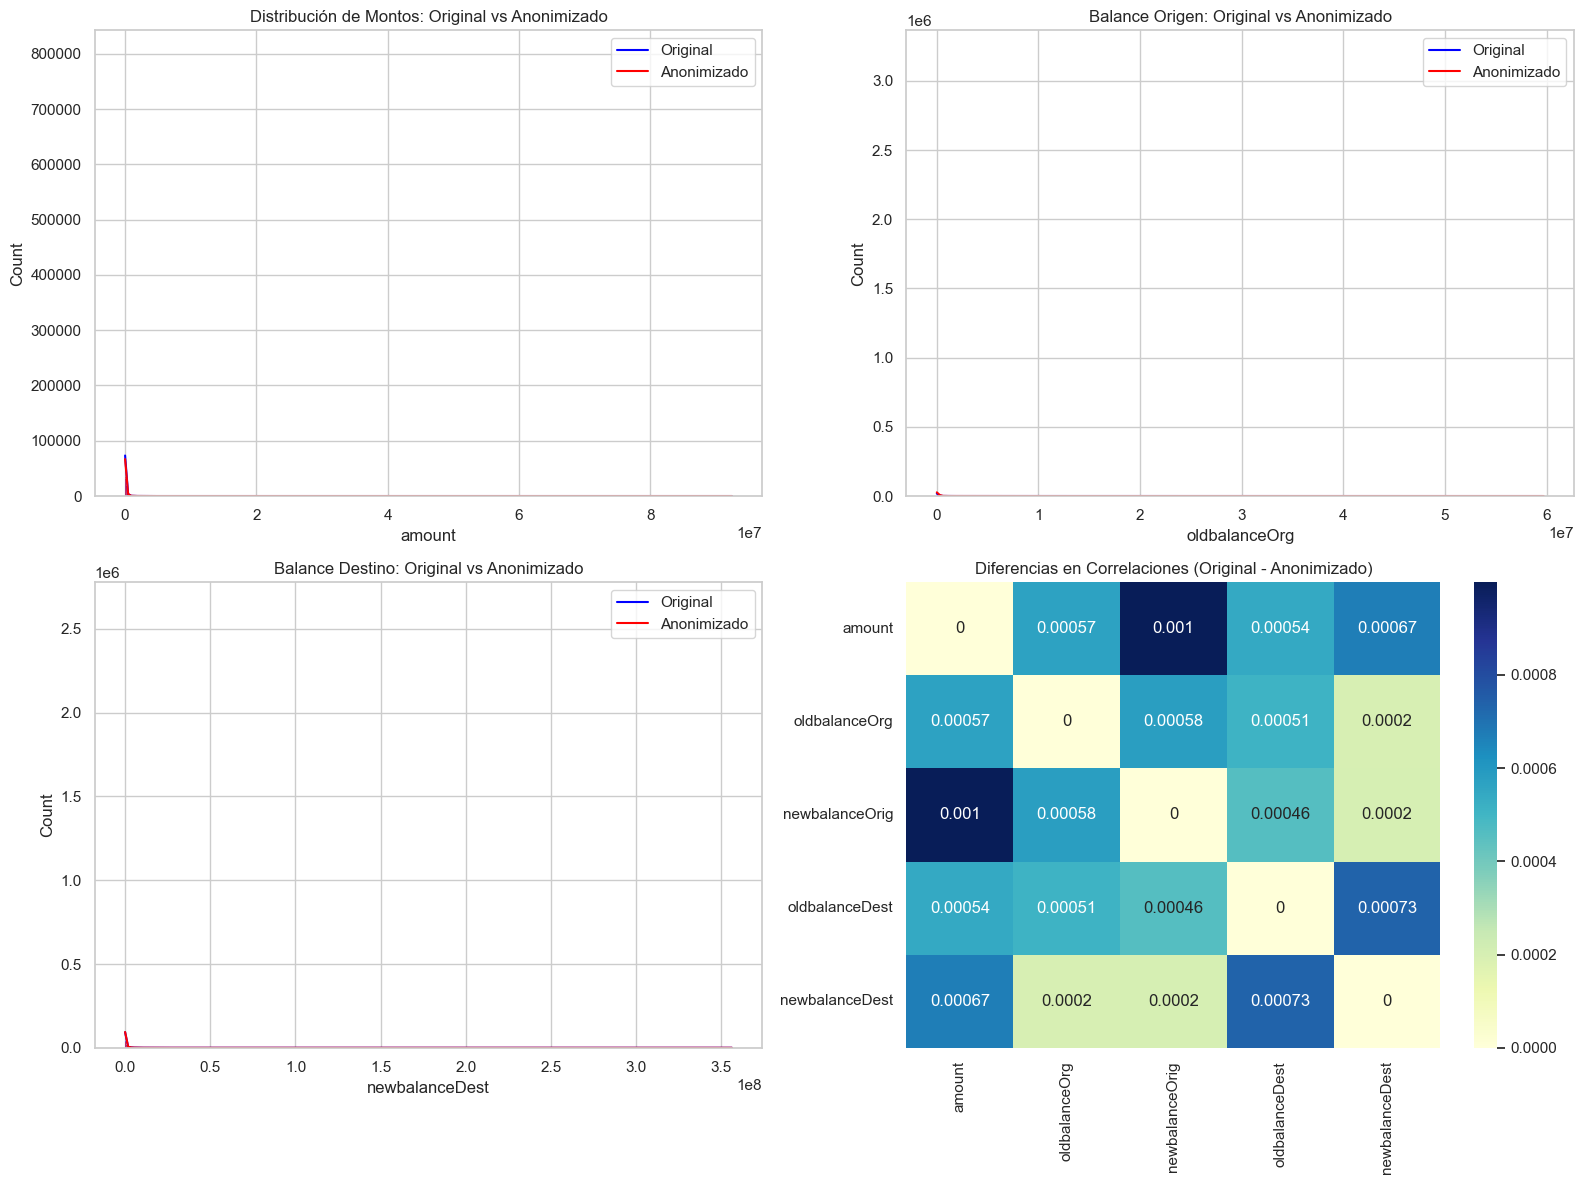


===== TÉCNICAS DE ANONIMIZACIÓN APLICADAS =====
1. Enmascaramiento y reemplazo sintético para identificadores de cuenta
2. Perturbación (ruido) para variables numéricas (montos y balances)
3. Microagregación para variables temporales (step)

===== EVALUACIÓN FINAL =====
Los datos han sido anonimizados preservando las distribuciones estadísticas
principales y las características de fraude, mientras se protege la información
personal identificable como IDs de origen y destino.


In [19]:
# Ejecutar todo el proceso
df_original, df_anonimizado = ejecutar_analisis_anonimizacion(ruta_entrada, ruta_salida)